In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Charger les 3 feuilles du fichier Excel dans 3 DataFrames différents
df1 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parc Régionaux", engine="openpyxl", header=3)
df2 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Distance", engine="openpyxl", header=4)
df3 = pd.read_excel("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parcours annuel moyen", engine="openpyxl", header=4)

# Propager les valeurs non-NaN dans les colonnes VP, Unnamed: 1 et Unnamed: 2
df2['VP'] = df2['VP'].ffill()
df2['Unnamed: 1'] = df2['Unnamed: 1'].ffill()
df2['Unnamed: 2'] = df2['Unnamed: 2'].ffill()
df3['VP'] = df3['VP'].ffill()
df3['Unnamed: 1'] = df3['Unnamed: 1'].ffill()
df3['Unnamed: 2'] = df3['Unnamed: 2'].ffill()


df1.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_Dis.xlsx", index=False)
df2.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_PAM.xlsx", index=False)
df3.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_PR.xlsx", index=False)

In [20]:
# Afficher les premières lignes de chaque DataFrame pour vérifier
'''print("DF1:")
print(df1.head())
'''
'''
print("\nDF2:")
print(df2.head(15))

'''
print("\nDF3:")
print(df3.head())


DF3:
      VP Unnamed: 1                         Unnamed: 2          2011  \
0  Total      Total                              Total  12920.997408   
1  Total      Total           Electrique et\nhydrogène    6713.97194   
2  Total      Total                  Essence thermique   8394.515111   
3  Total      Total  Essence hybride\nnon rechargeable  16501.709719   
4  Total      Total      Essence hybride\nrechargeable  17703.285305   

           2012          2013          2014          2015          2016  \
0  12830.690278  12726.301855  12725.734852  12730.783291  12760.485575   
1   8822.039199   9066.831413   9307.099739   9673.830428   9818.331108   
2    8233.27699   8125.082885    8139.39222   8214.190897   8374.877599   
3  16062.130445  15996.441776  16159.738569  16292.929907  16292.106737   
4  17204.279421  16789.536979  16349.706069   16075.05933  15973.141154   

           2017          2018          2019          2020          2021  \
0  12658.732108  12516.418604  1256

In [6]:
# Extraire les lignes de 0 à 29
lignes_to_copy = df3.iloc[0:30]

# Insérer ces lignes après la ligne 29, donc dans les lignes 30 à 59
df_with_copied_rows = pd.concat([df3.iloc[:30], lignes_to_copy, df3.iloc[30:]]).reset_index(drop=True)

# Extraire les lignes de 30 à 59
df_lines_30_59 = df_with_copied_rows.iloc[30:60]

# Remplacer "Total" par "Moyennes régionales" dans la colonne "VP" (colonne 0) pour les lignes 30 à 59
df_lines_30_59.loc[:, 'VP'] = df_lines_30_59['VP'].replace('Total', 'Moyennes régionales')

# Diviser les valeurs des colonnes à partir de la 4ème colonne (incluse) par 20
df_lines_30_59 = df_lines_30_59.copy()
df_lines_30_59.loc[:, df_lines_30_59.columns[3:]] = df_lines_30_59.iloc[:, 3:] / 20



# Réinsérer ces lignes modifiées dans le DataFrame
df_with_modifications = pd.concat([df_with_copied_rows.iloc[:30], df_lines_30_59, df_with_copied_rows.iloc[60:]]).reset_index(drop=True)

#Afficher les premières lignes pour vérifier
print(df_with_copied_rows.iloc[25:60]) 

df_with_modifications.to_csv("/home/onyxia/work/Statapp/Bases/parc_vp_region_2024_1_Dis_V2.xlsx", index=False)

                     VP      Unnamed: 1                         Unnamed: 2  \
25                Total    particuliers                   Diesel thermique   
26                Total    particuliers   Diesel hybride non\nrechargeable   
27                Total    particuliers       Diesel hybride\nrechargeable   
28                Total    particuliers                                Gaz   
29                Total    particuliers                      Non déterminé   
30  Moyennes régionales           Total                              Total   
31  Moyennes régionales           Total           Electrique et\nhydrogène   
32  Moyennes régionales           Total                  Essence thermique   
33  Moyennes régionales           Total  Essence hybride\nnon rechargeable   
34  Moyennes régionales           Total      Essence hybride\nrechargeable   
35  Moyennes régionales           Total                   Diesel thermique   
36  Moyennes régionales           Total   Diesel hybride non\nre

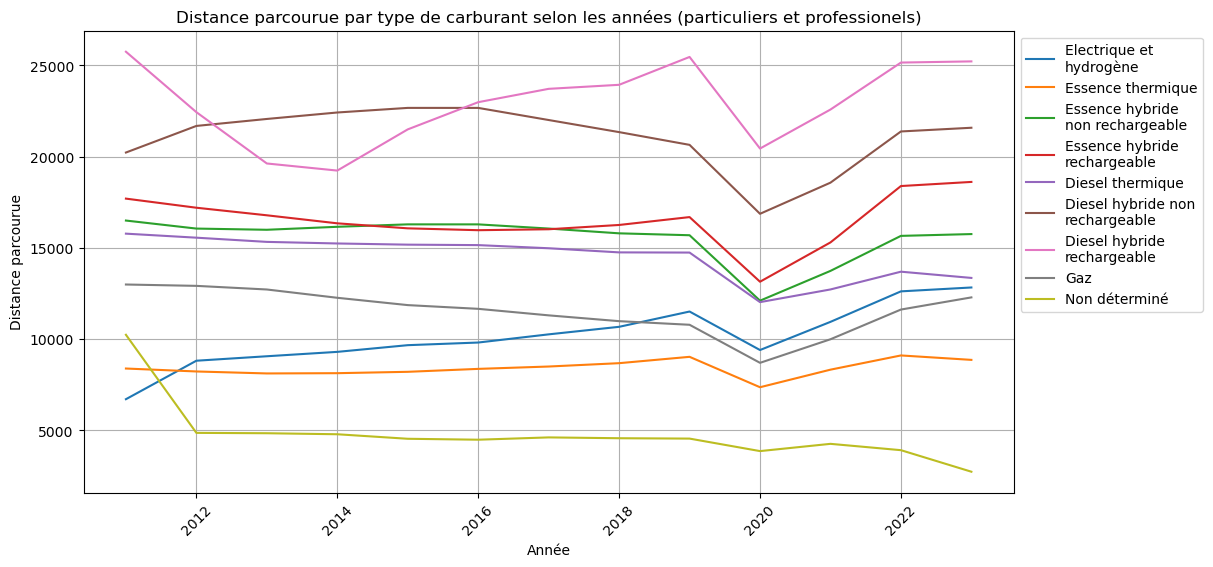

In [7]:

'''
Tracer les kilométrages annuels selon les années selon les carburants. 
'''
# Charger les données dans un DataFrame
df_km_tot = df_with_modifications.iloc[:10].reset_index(drop=True)

# Renommer les colonnes pour éviter les "Unnamed" (à changer un peu parce que c'est pas sur que ce soit le bon nom)
df_km_tot.rename(columns={"Unnamed: 1": "Statut", "Unnamed: 2": "Carburant"}, inplace=True)

# Filtrer pour exclure la ligne "Total" dans la colonne "Carburant"
df_km_tot = df_km_tot[df_km_tot["Carburant"] != "Total"]

# Sélectionner les années (colonnes à partir de la 4ᵉ colonne)
years = df_km_tot.columns[3:]


# Tracer les courbes
plt.figure(figsize=(12, 6))

for _, row in df_km_tot.iterrows():
    plt.plot(years, row[3:].values, label=row["Carburant"])  # Tracer chaque ligne

# Personnalisation du graphique
plt.xlabel("Année")
plt.ylabel("Kilométrage annuel")
plt.title("Kilométrge annuel par type de carburant selon les années (particuliers et professionels)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Mettre la légende en dehors du graphe

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des années pour une meilleure lisibilité
plt.grid(True)
plt.show()

On regroupe par type de véhicule : 
- électriques et hydrogènes --> VE
- essence et diesel rechargeable --> VHR
- le reste --> Thermiques 
Pour regrouper, on fait des moyennes pondérées du kilométrage par le nombre de voiture de chaque type.
Par exemple pour avoir la moyenne sur les VHR : on calcule la moyenne des kilométrages des véhicules à essence hybride rechargeable et diesel hybride rechargeable pondérée par le nombre de véhicule de chaque type.


In [14]:
df3['Région de résidence'].value_counts()

Région de résidence
Île-de-France                 1138
Auvergne-Rhône-Alpes          1093
Provence-Alpes-Côte d'Azur    1077
Occitanie                     1073
Nouvelle-Aquitaine            1072
Hauts-de-France               1065
Grand Est                     1027
Pays de la Loire               985
Bourgogne-Franche-Comté        964
Bretagne                       944
Centre-Val de Loire            937
Normandie                      936
Corse                          737
La Réunion                     708
Guadeloupe                     687
Martinique                     668
Guyane                         555
Mayotte                        541
Inconnue                       460
Name: count, dtype: int64

In [16]:
df1['Carburant'].value_counts()

Carburant
Diesel thermique                    4445
Essence thermique                   3610
Gaz                                 2422
Non déterminé                       1641
Essence hybride non rechargeable    1482
Electrique et hydrogène             1244
Essence hybride rechargeable         902
Diesel hybride non rechargeable      496
Diesel hybride rechargeable          425
Name: count, dtype: int64

In [24]:
# Dictionnaire des nombres de véhicules
nb_vehicules = {
    'Diesel thermique': 4445,
    'Essence thermique': 3610,
    'Gaz': 2422,
    'Non déterminé': 1641,
    'Essence hybride\nnon rechargeable': 1482,
    'Electrique et\nhydrogène': 1244,
    'Essence hybride\nrechargeable': 902,
    'Diesel hybride\nrechargeable': 425,
    'Diesel hybride non\nrechargeable': 496
}

# Définir les années
annees = list(range(2011, 2024))

# Initialiser le DataFrame résultat
resultats = pd.DataFrame(index=['VE', 'VHR', 'Thermiques'], columns=annees)

# Pour chaque année
for annee in annees:
    # VE (Electrique et hydrogène)
    resultats.loc['VE', annee] = df3[df3['Unnamed: 2'] == 'Electrique et\nhydrogène'][annee].values[0]
    
    # VHR (moyenne pondérée des rechargeables)
    km_essence_rech = df3[df3['Unnamed: 2'] == 'Essence hybride\nrechargeable'][annee].values[0]
    km_diesel_rech = df3[df3['Unnamed: 2'] == 'Diesel hybride\nrechargeable'][annee].values[0]
    
    resultats.loc['VHR', annee] = (
        (km_essence_rech * nb_vehicules['Essence hybride\nrechargeable'] +
         km_diesel_rech * nb_vehicules['Diesel hybride\nrechargeable']) /
        (nb_vehicules['Essence hybride\nrechargeable'] + 
         nb_vehicules['Diesel hybride\nrechargeable'])
    )
    
    # Thermiques (le reste)
    types_thermiques = [
        'Diesel thermique', 
        'Essence thermique',
        'Gaz',
        'Non déterminé',
        'Essence hybride\nnon rechargeable',
        'Diesel hybride non\nrechargeable'
    ]
    
    numerateur = sum(
        df3[df3['Unnamed: 2'] == type_][annee].values[0] * nb_vehicules[type_]
        for type_ in types_thermiques
    )
    denominateur = sum(nb_vehicules[type_] for type_ in types_thermiques)
    
    resultats.loc['Thermiques', annee] = numerateur / denominateur

# Afficher les résultats
print(resultats)

                    2011          2012          2013          2014  \
VE            6713.97194   8822.039199   9066.831413   9307.099739   
VHR         20280.977163  18881.285201  17698.845435  17275.279393   
Thermiques  12999.534323  12255.240806  12125.098584  12046.312687   

                    2015          2016          2017          2018  \
VE           9673.830428   9818.331108  10266.440936  10679.443491   
VHR         17811.312013  18219.406237  18488.735003  18719.272346   
Thermiques  11970.227488   11962.33636  11847.019137   11711.84908   

                    2019          2020          2021          2022  \
VE          11516.889416   9407.754901  10951.351778  12622.126829   
VHR         19501.430306  15487.034914  17635.866345  20559.062928   
Thermiques   11725.92779   9494.967163  10460.403588  11506.457996   

                    2023  
VE           12834.65722  
VHR         20733.084557  
Thermiques  11331.305126  


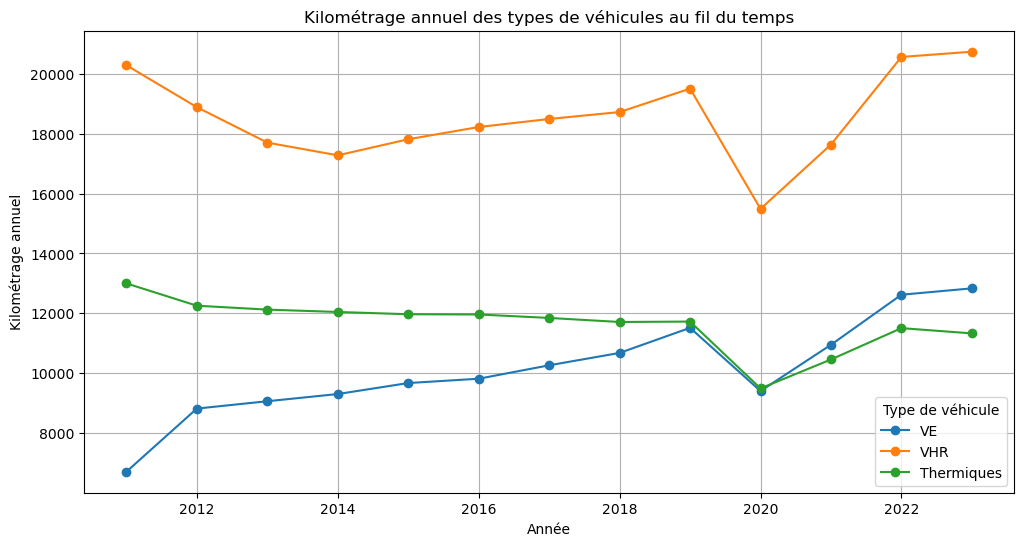

In [27]:
import matplotlib.pyplot as plt

# Ton DataFrame (resultats)
resultats.T.plot(figsize=(12, 6), marker='o', linestyle='-')

# Ajouter des labels et un titre
plt.xlabel("Année")
plt.ylabel("Kilométrage annuel")
plt.title("Kilométrage annuel des types de véhicules au fil du temps")
plt.legend(title="Type de véhicule")
plt.grid(True)

# Afficher le graphique
plt.show()
